In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

dataset = pd.read_csv('https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')

# Nos quedamos sólo con las que comienzan con pf_indentity, junto con otras columnas más generales
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols

# Casi todas las columnas se leen como objetos debido a que los valores nulos están marcados con -. Los vamos a eliminar y volveremos a convertir las columnas con puntajes a tipo numérico.
dataset = dataset[important_cols].replace('-', np.nan)
for score_col in score_cols:
    dataset[score_col] = pd.to_numeric(dataset[score_col])
dataset

# Por ahora las filas con NaN de hf_score y pf_identity las eliminaremos.
dataset = dataset.dropna(subset=['hf_score', 'pf_identity'])

dataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0
2,2017,AGO,Angola,Sub-Saharan Africa,10.0,0.0,0.0,0.0,5.0,5.0,5.98,121.0,4.83,158.0,5.40,151.0
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
4,2017,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,7.5,8.2,7.15,72.0,7.70,27.0,7.42,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.29,7.0,8.18,6.0,8.73,4.0
1616,2008,DNK,Denmark,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.49,3.0,7.98,9.0,8.73,4.0
1617,2008,CHE,Switzerland,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.31,6.0,8.35,4.0,8.83,3.0
1618,2008,NZL,New Zealand,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.42,4.0,8.46,3.0,8.94,2.0


# Parte 1

## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  3. Para cada país, tenemos varias realizaciones para cada variable *pf_identity* y *hf_score*. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana? 
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.
  3. ¿Tiene sentido calcular la moda?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  

#### 1.1 Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [2]:
# 1.1 Rango de las variables

ranges = pd.concat([dataset.min(), dataset.max()], axis=1) 
ranges.columns = ['Minimo', 'Maximo']
print("Rangos de las variables: ")
display(ranges)

Rangos de las variables: 


,Minimo,Maximo
year,2008,2017
ISO_code,AGO,ZWE
countries,Albania,Zimbabwe
region,Caucasus & Central Asia,Western Europe
pf_identity_legal,0,10
pf_identity_sex_male,0,10
pf_identity_sex_female,0,10
pf_identity_sex,0,10
pf_identity_divorce,0,10
pf_identity,0,10


El rango se refiere a la diferencia entre el valor máximo y mínimo de una variable. En las variables de Identidad específicas el rango es 10, porque en general se establecen requisitos que si se cumplen se asignan 10 puntos, sin necesidad de aumentos graduales.

Dado que el rango no es informativo si no tenemos conocimiento de la media, mediana, la desviación estandar y los cuantiles. La siguiente tabla es más informativa. Por ejemplo, nos indica que el score promedio del Human Freedom index es 6.98, que no difiere mucho de la mediana (6.9), aunque el rango (5,43) es 78% de la media.

In [3]:
display(dataset.describe())

,year,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
count,1540.000000,308.000000,1537.000000,1540.000000,1540.000000,1519.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000
mean,2012.625974,6.379870,6.701366,7.922078,7.314935,7.485188,7.280649,7.163409,77.671429,6.792981,77.420779,6.978214,77.465584
std,2.855925,3.640415,4.685828,4.038529,4.056317,3.502156,3.181577,1.392409,44.757695,0.906827,44.776169,1.056239,44.782074
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.220000,1.000000,2.580000,1.000000,3.690000,1.000000
25%,2010.000000,7.000000,0.000000,10.000000,5.000000,5.000000,5.000000,6.147500,39.000000,6.220000,39.000000,6.280000,39.000000
50%,2013.000000,7.000000,10.000000,10.000000,10.000000,10.000000,8.800000,7.145000,77.500000,6.880000,77.000000,6.900000,77.000000
75%,2015.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.380000,116.000000,7.440000,116.000000,7.880000,116.000000
max,2017.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.560000,162.000000,9.110000,162.000000,9.120000,162.000000


#### 1.2 Para cada país, tenemos varias realizaciones para cada variable pf_identity y hf_score. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana?


La manera adecuada de comparar un país con otro va a depender de la pregunta que queramos responder. Si quisiéramos ver una evolución temporal se podría hacer una regresión lineal a través del tiempo, y la pendiente nos daría información de si crece o decrece el parámetro. Si se quisiera comparar el estado en un momento específico se puede hacer un análisis transversal, considerando una realización para cada país u otra opción es considerando un rango temporal, por ejemplo los últimos 5 años, y comparar los estadísticos correspondientes.

Se puede hacer un análisis transversal, comparando a lo largo de un período los valores que asumen las diferentes variables o comparar la series a lo largo del tiempo, por ejemplo entre Argentina y Brasil o Argentina y Armenia. 
La siguiente tabla muestra los estadísticos (transversales) del Human Freedom index y de la característica identidad del Personal Freedom index a nivel mundial desde el 2008 en adelante. Por ejemplo, nos sugiere que la media (transversal) del indicador de identidad así como el indicador global del Human Freedom han ido disminuyendo a lo largo del tiempo. 
 

In [4]:
# 1.2 Comparamos en el tiempo
dataset_group_by_year = dataset[['year','pf_identity', 'hf_score']].groupby('year').describe() # Agrupamos por año y calculamos estadísticos
dataset_group_by_year = dataset_group_by_year.sort_values(by='year', ascending = False).reset_index() # Ponemos al año como una columna
print('Tabla de estadísticos de las variables "pf_identity" y "hf_score" \n a nivel mundial por año:\n')
display(dataset_group_by_year)

Tabla de estadísticos de las variables "pf_identity" y "hf_score" 
 a nivel mundial por año:



year pf_identity                                                  hf_score  \
              count      mean       std  min   25%   50%   75%   max    count   
0  2017       162.0  6.496914  3.153908  0.0  4.35   7.5   9.0  10.0    162.0   
1  2016       162.0  6.870370  3.069260  0.0  5.00   8.2   9.0  10.0    162.0   
2  2015       159.0  6.964151  2.954299  0.0  5.00   8.2   9.0  10.0    159.0   
3  2014       159.0  7.416352  3.253623  0.0  5.00   8.8  10.0  10.0    159.0   
4  2013       157.0  7.367516  3.278430  0.0  5.00   8.8  10.0  10.0    157.0   
5  2012       153.0  7.452941  3.263939  0.0  5.00   8.8  10.0  10.0    153.0   
6  2011       153.0  7.452941  3.263939  0.0  5.00   8.8  10.0  10.0    153.0   
7  2010       153.0  7.485621  3.258197  0.0  5.00   8.8  10.0  10.0    153.0   
8  2009       141.0  7.721986  3.083646  0.0  6.30  10.0  10.0  10.0    141.0   
9  2008       141.0  7.721986  3.083646  0.0  6.30  10.0  10.0  10.0    141.0   

                                                          
       mean       std   min     25%    50%     75%   max  
0  6.887963  1.104117  3.79  6.2125  6.825  7.7400  8.88  
1  6.892716  1.110646  3.69  6.1750  6.820  7.7575  8.90  
2  6.922264  1.110216  3.83  6.1850  6.780  7.8300  8.89  
3  6.949937  1.085174  3.94  6.2250  6.830  7.9300  8.95  
4  6.970191  1.041741  3.88  6.3400  6.870  7.8300  8.94  
5  6.978039  1.047574  4.55  6.3100  6.880  7.9400  8.99  
6  7.014575  1.031029  4.59  6.2800  6.960  7.9400  9.02  
7  7.035294  0.997250  4.92  6.3600  6.960  7.8800  9.02  
8  7.083050  0.990601  4.91  6.4000  7.020  7.9800  9.06  
9  7.078014  1.029123  4.81  6.3700  7.040  8.0000  9.12

De la observación de los datos originales podemos decir que en cuanto a identidad personal, Argentina ha mostrado mayores indices de libertad desde el 2008 en adelante. Brasil ha empeorado su posición desde el 2015. En cuanto al indicador global del Human Freedom, Argentina ha mostrado valores cercanos a la media mundial, en todos los períodos desde el 2008, aunque todavía no logra superar esos valores.

In [ ]:
# 1.2 Comparación de hf_score y pf_identity  Argentina, Brasil, Armenia y Venezuela
def comparar_paises(list_countries,range_years,dataset):
  ###  list_countries : lista de paises a comparar
  ###  range_years : tupla de valores del rango de años a analizar
  ### funcion para generar dataframe con los valores de conteo, media, desv estandar
  ### min, max y mediana de las variables pf_identity y hf_score
  min_y = min(range_years)
  max_y = max(range_years)
  if min_y == max_y:
    ds = dataset[dataset['countries'].isin(list_countries) & (dataset['year']==min_y)]
    ds = ds[['countries','pf_identity', 'hf_score']].reset_index()
    
    ds['year'] = pd.Series('('+str(min_y)+')', index=ds.index)
    cols = ds.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    ds = ds[cols] 
  else:
    years= list(range(min_y,max_y+1))
    ds = dataset[(dataset['countries'].isin(list_countries)) & (dataset['year'].isin(years))]
    ds = ds[['countries','pf_identity', 'hf_score']].groupby('countries').describe(percentiles=[.5])
    ds.rename(columns = {'50%':'median'}, inplace=True)

    ds['years'] = pd.Series('('+str(min_y)+'-'+str(max_y)+')', index=ds.index)
    cols = ds.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    ds = ds[cols] 
  return ds



list_countries = ['Argentina','Armenia','Brazil','Venezuela']
range_years = (2013,2017)
print('Tabla con análisis de las variables "pf_identity" y "hf_score" para comparar entre países:\n')
comparar_paises(list_countries,range_years,dataset)

Tabla con análisis de las variables "pf_identity" y "hf_score" para comparar entre países:



years pf_identity         ... hf_score             
                             count   mean  ...      min median   max
countries                                  ...                      
Argentina  (2013-2017)         5.0  10.00  ...     6.27   6.55  6.86
Armenia    (2013-2017)         5.0   8.44  ...     7.34   7.43  7.53
Brazil     (2013-2017)         5.0   8.02  ...     6.21   6.45  6.75
Venezuela  (2013-2017)         5.0   7.52  ...     3.80   4.13  4.84

[4 rows x 13 columns]

Observamos que  la media y la desviación estandar de la identidad del personal freedom es alta en Argentina con respecto a Armenia y Brazil. El Human Freedom score en todos los casos son mayores con respecto a los casos de Venezuela.

La moda solo sería relevante al comparar en la variables cualitativas para comparar las variables entre paises.

#### 1.3 Media, mediana y desviación estandar para pf_identity y hf_score: Obtener media, mediana y desviación estándar de las variables pf_identity y hf_score en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.

In [5]:
# 1.3 Media, mediana y desviación estandar para pf_identity y hf_score
def statistics_table(var,dataset):
  world_mean = dataset[var].mean()
  world_median = dataset[var].median()
  world_std = dataset[var].std()

  la_mean = dataset[(dataset.region == "Latin America & the Caribbean")][var].mean()
  la_median = dataset[(dataset.region == "Latin America & the Caribbean")][var].median()
  la_std = dataset[(dataset.region == "Latin America & the Caribbean")][var].std()

  table = pd.DataFrame({'Media': [world_mean,la_mean],
                   'Mediana': [world_median,la_median],
                   'Desviación Estandar': [world_std,la_std]},
                  index=['Mundo', 'Latinoamerica'])
  return table

print("Valores para hf_score:")
display(statistics_table('hf_score',dataset))
print('\n')
print("Valores para pf_identity:")
display(statistics_table('pf_identity',dataset))



Valores para hf_score:


,Media,Mediana,Desviación Estandar
Mundo,6.978214,6.90,1.056239
Latinoamerica,7.036977,7.02,0.634897




Valores para pf_identity:


,Media,Mediana,Desviación Estandar
Mundo,7.280649,8.8,3.181577
Latinoamerica,8.582171,10.0,1.875832


La comparación de latinoamerica con respecto puede hacerse observando la media y la desviación estandar (corregida por los grados de libertad), indicadores BLUE (Best Linear unbiased estimator). En el caso de los dos indicadores analizados, la dispersión de los datos (mostrada por la desviación estándar) en Latinoamérica es menor que en el mundo, esto es así porque vemos (en el Box-plot mostrado en el siguiente código) regiones bastante alejadas de la media mundial; e.g. Mediano Oriente y Africa del Norte.


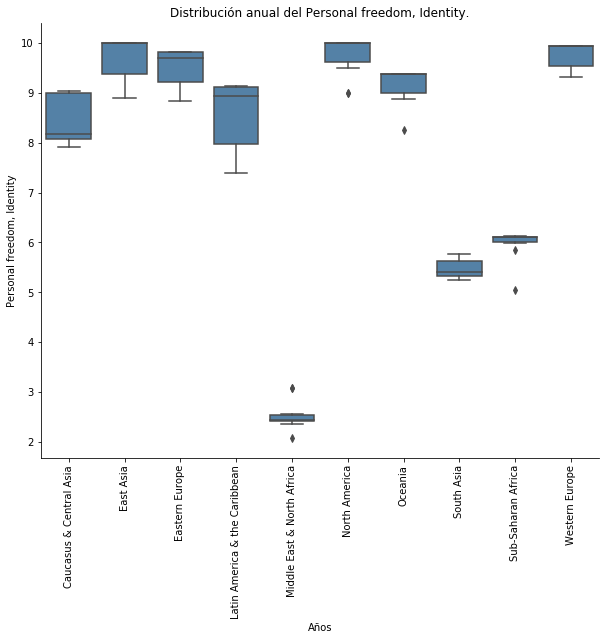

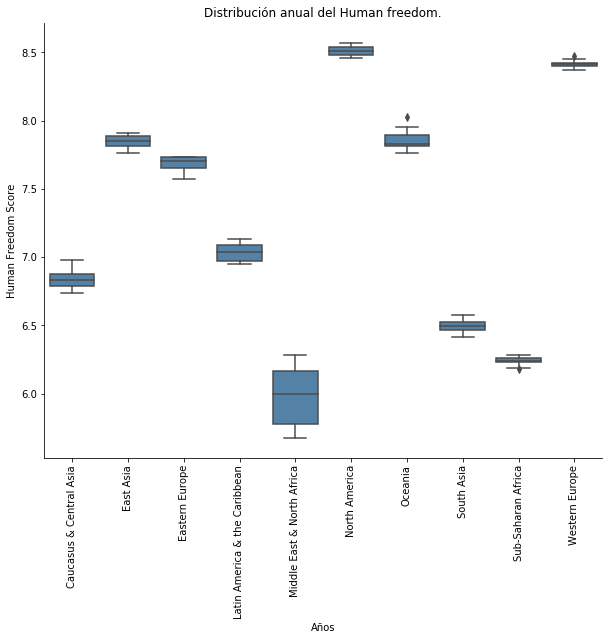

In [6]:
pf_identity_group_by_year_region = dataset[['year', 'region', 'pf_identity']].groupby(['region', 'year']).mean()
pf_identity_group_by_year_region = pf_identity_group_by_year_region.reset_index() # Ponemos al año como una columna

# Gráfico de evolución de medias: Box-Plot Regional

# Identity
plt.figure(figsize=(10,8))
seaborn.boxplot(data=pf_identity_group_by_year_region,x='region', y='pf_identity', color='steelblue')

plt.ylabel('Personal freedom, Identity')
plt.xlabel('Años')
plt.title('Distribución anual del Personal freedom, Identity.')
plt.xticks(rotation=90)
seaborn.despine()

hf_score_group_by_year_region = dataset[['year', 'region', 'hf_score']].groupby(['region', 'year']).mean()
hf_score_group_by_year_region = hf_score_group_by_year_region.reset_index()

# Human Freedom Score
plt.figure(figsize=(10,8))
seaborn.boxplot(data=hf_score_group_by_year_region,x='region', y='hf_score', color='steelblue')

plt.ylabel('Human Freedom Score')
plt.xlabel('Años')
plt.title('Distribución anual del Human freedom.')
plt.xticks(rotation=90)
seaborn.despine()

El Boxplot nos muestra como estan distribuidos las medias de Identidad de cada región, dividiendo el mundo en 10 regiones. En cuanto a la libertad personal, Latinoamérica y el Caribe estan en el puesto 7, detrás de Africa y el Sur de Asia. En el caso del Human Freedom Latinoamérica y el Caribe estan en el puesto 6.

Observamos además varios valores aberrantes, también llamados Outliers, en seís regiones: a) Middle East & North Africa ( en los dos lados de la distribución) b) North America (en el lado inferior), c) Oceania (en el lado inferior también) y d) Sub-Saharian Africa (en los dos lados)

#### 1.4 ¿Tiene sentido calcular la moda?

La moda nos brinda el dato que mas se repite, tiene séntido calcularla porque nos puede informar si la distribución de la variable puede ser bimodal o no. La moda es más facil de encontrar en el caso de las variables cualitativas. En el caso de las diferentes formas de la identidad es relevante calcular la moda porque son variables ordinales, reflejando un caracter cualitativo. Sin embargo, al poder moverse bruscamente de 1 al 10, pierde relevancia.

Para los scores, que asumen forma cuantitativa, casi no tiene sentido calcular la moda, si tiene relevancia en casos bimodales para calcular los valores cercanos que se repiten más.

#### 1.5 ¿Cómo pueden sanearse los valores faltantes?

La manera más sencilla es obviarlos. Eso no tiene consecuencias cuando estan al principio o al final de los datos. En análisis transversal obviarlos puede tener consecuencias cuando el país que, se supone por otros datos, lidera el cambio es excluido por falta de datos específicos a la variable analizada. Otra manera es reemplazar el outlier por la media, el sesgo incorporado sera reducido. 

Para este análisis hemos removido las filas con valores NaN en las columnas hf_score y pf_identity ya que no era una opción eliminar alguna de esas variables. Pero también se podría no eliminar y reemplazar los faltantes por algún otro valor de interés como la media, la mediana o la moda. Siendo la moda más adecuada para casos con variables de tipo categorías ya que en ellas no podemos calcular su media. 

Además hay métodos alternativos de extrapolación de datos; Pandas nos facilita dichas alternativas, pero esta en nosotros tomar las decisiones que tengan como objetivo proponer BLUE estimators para el reemplazo de los Outliers.

#### 1.6 ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?

El método utilizado para la detección de outliers fue la representación gráfica del rango intercuatil mediante la función boxplot de seaborn.


En los box-plots previos se analizaba la distribución de las medias de los índices hf and pf_identity. En este caso vemos la observación de los valores en sí. Esto es esperar que encontremos más outliers de los encontrados anteriormente.

En línea con los gráficos presentados se define el tamaño de cada box y luego se le hace el plot estirando sus brazos en 1.5 veces el tamaño del box. Los valores cuyas diferencias con la mediana que excedan (en valor absoluto) 1.5 veces el tamaño del intervalo de confianza (definido entre los cuantiles 25% y 75%) serán considerados outliers.

De los box-plots siguientes se observa:
a) Que la variable pf_identity no presenta outliers globales (considerando todo el mundo), pero si presenta outliers en algunas de sus regiones,
b)La variable hf_score presenta outliers en algunas regiones y en el análisis global.
c) En el análisis regional observamos varios outliers, en 6 lados en el caso del personal Freedom (mostrado en gráfico correspondiente) y uno en el caso del Human Freedom (upper side)
d) Observamos uno global en el caso del pf_identity en el 2015 (ver primer box-plot presentado previamente)

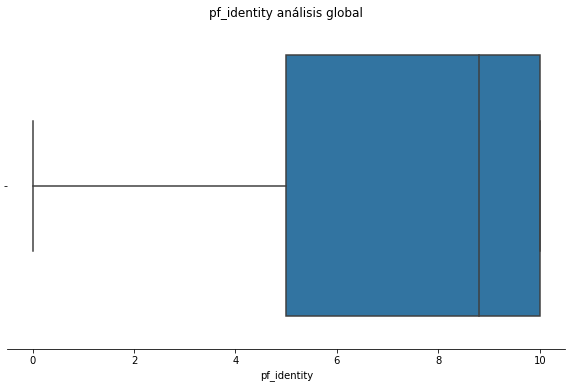

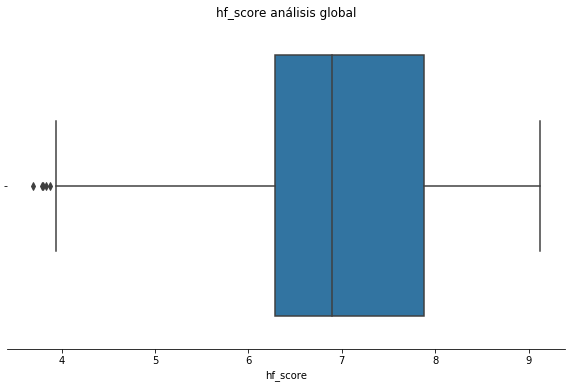

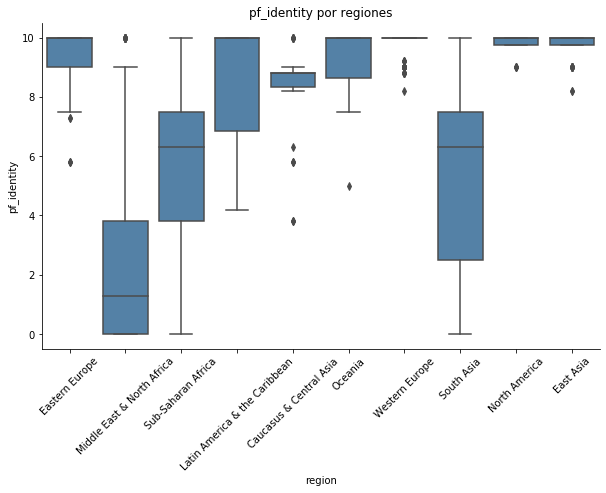

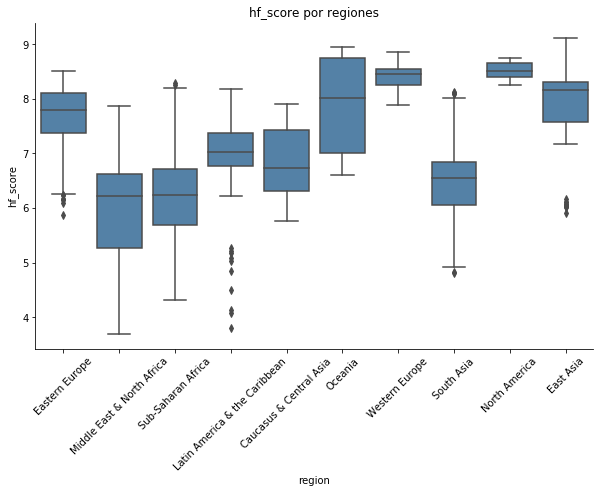

In [24]:
plt.figure(figsize=(10,6))
plt.title('pf_identity análisis global')
seaborn.boxplot(x=dataset['pf_identity'])
seaborn.despine(left=True)
plt.figure(figsize=(10,6))
plt.title('hf_score análisis global')
seaborn.boxplot(x=dataset['hf_score'])
seaborn.despine(left=True)
plt.figure(figsize=(10,6))
seaborn.boxplot(data=dataset,
                x='region', y='pf_identity',color= 'steelblue')
plt.ylabel('pf_identity')
plt.xlabel('region')
plt.title('pf_identity por regiones')
plt.xticks(rotation=45)
seaborn.despine()
plt.figure(figsize=(10,6))
seaborn.boxplot(data=dataset,
                x='region', y='hf_score',color= 'steelblue')
plt.ylabel('hf_score')
plt.xlabel('region')
plt.title('hf_score por regiones')
plt.xticks(rotation=45)
seaborn.despine()



Creemos que si sería necesario removerlos. Hay varias formas de corregir los datos. Los podemos encontrar de la siguiente manera.

In [8]:
def find_outliers(dataset, column_name):
    interesting_col = dataset[column_name]
    CI =  (interesting_col.quantile(0.75)-interesting_col.quantile(0.25))
    mask_outlier = (np.abs(interesting_col - interesting_col.median()) >= (1.5 * CI))
    return dataset[mask_outlier]

df_outliers_median = find_outliers(dataset,'hf_score')
display(df_outliers_median[['year','countries','region','hf_score']])

,year,countries,region,hf_score
44,2017,Egypt,Middle East & North Africa,4.50
70,2017,Iraq,Middle East & North Africa,4.34
137,2017,Sudan,Sub-Saharan Africa,4.32
141,2017,Syria,Middle East & North Africa,3.79
157,2017,Venezuela,Latin America & the Caribbean,3.80
159,2017,"Yemen, Rep.",Middle East & North Africa,4.30
206,2016,Egypt,Middle East & North Africa,4.49
232,2016,Iraq,Middle East & North Africa,4.28
249,2016,Libya,Middle East & North Africa,4.48
299,2016,Sudan,Sub-Saharan Africa,4.44


En línea con lo mencionado anteriormente los dos primeros casos muestran dos outliers en Medio Oriente y el Norte de Africa. En Latinoamérica Venezuela en el 2016 puede considerarse un outlier, el Human Freedom score es 4.13.  

## 2. Agregación de datos
1. Grafiquen la media de la variable pf_identity y hf_score a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable pf_identity en la región. ¿Cómo seleccionaron los países relevantes a esa tendencia?

Pista: hay gráficos de seaborn que permiten generar visualizaciones para cada valor de una variable categórica, en este caso, las distintas regiones.

Sólo por curiosidad, graficar la tendencia de hf_score y ef_score a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

#### 2.1 Grafiquen la media de la variable pf_identity y hf_score a través de los años.

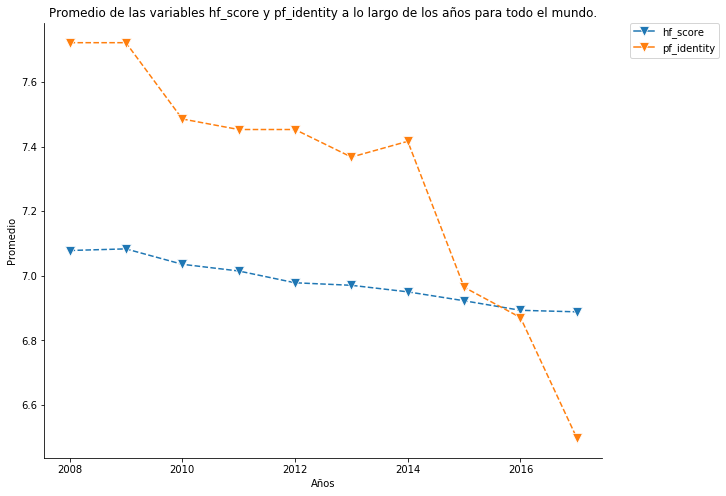

In [9]:
# Media, a través de los años, de hf_score y pf_identity

# Agrupamos las dos columnas por año.
dataset_group_by_year = dataset[['year','pf_identity', 'hf_score']].groupby('year').mean()
dataset_group_by_year = dataset_group_by_year.reset_index() # Ponemos al año como una columna

plt.figure(figsize=(10,8))
ax = seaborn.lineplot(x='year',y='hf_score',data=dataset_group_by_year, label='hf_score',marker='v', markersize=10, ci=None)
ax = seaborn.lineplot(x='year',y='pf_identity',data=dataset_group_by_year, label='pf_identity', marker='v', markersize=10, ci=None)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Promedio de las variables hf_score y pf_identity a lo largo de los años para todo el mundo.')
plt.xlabel('Años')
plt.ylabel('Promedio')
ax.lines[0].set_linestyle("--")
ax.lines[1].set_linestyle("--")
seaborn.despine()

El gráfico confirma la tendencia decreciente mencionada anteriormente de los indicadores de libertad. El Human Freedom Score cae menos pronunciadamente que el personal Identity Freedom score, lo cual es esperado. Los saltos del último son bruscos al ser una variable compuesta de variables ordinales.

#### 2.2 Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?

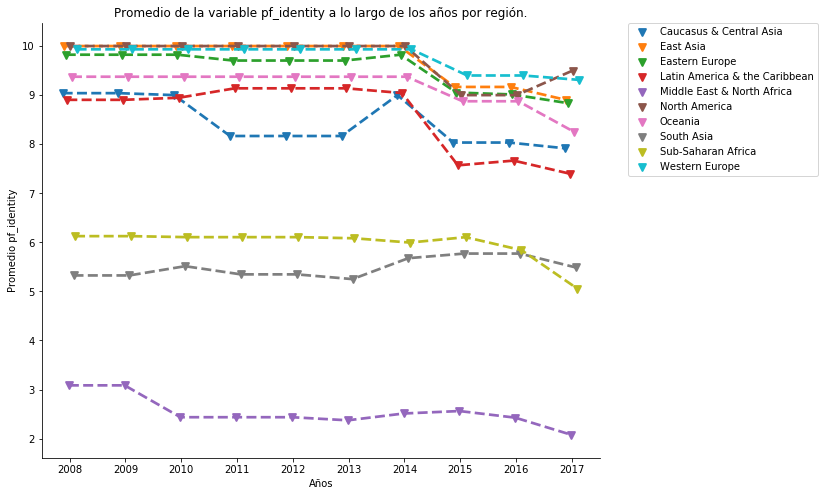

In [10]:
# Gráfico por región para pf_identity.

# Agrupamos las dos columnas por año y por región.
pf_identity_group_by_year_region = dataset[['year', 'region', 'pf_identity']].groupby(['region', 'year']).mean()
pf_identity_group_by_year_region = pf_identity_group_by_year_region.reset_index() # Ponemos al año como una columna

plt.figure(figsize=(10,8))
seaborn.pointplot(data=pf_identity_group_by_year_region,
                  x='year', y='pf_identity',
                  hue='region', dodge=True, ci=None,
                  markers='v', linestyles='--', errwidth=1, capsize=0.2)

plt.ylabel('Promedio pf_identity')
plt.xlabel('Años')
plt.title('Promedio de la variable pf_identity a lo largo de los años por región.')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

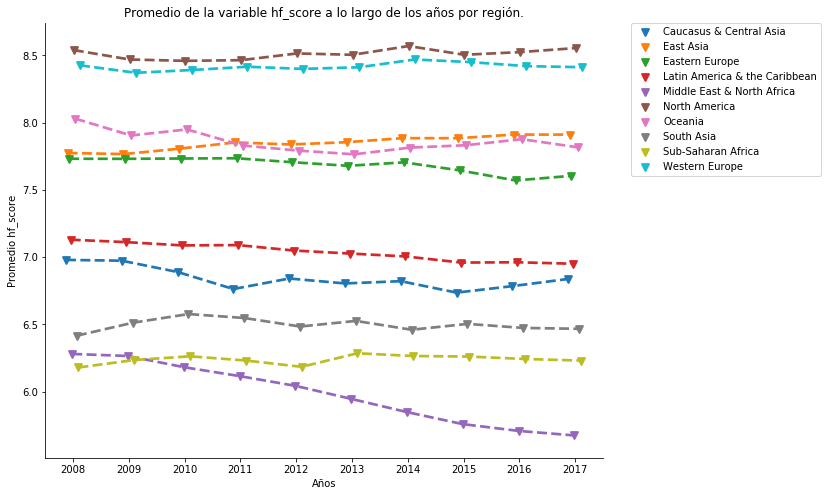

In [11]:
# Gráfico por región para hf_score.

# Agrupamos las dos columnas por año y por región.
hf_score_group_by_year_region = dataset[['year', 'region', 'hf_score']].groupby(['region', 'year']).mean()
hf_score_group_by_year_region = hf_score_group_by_year_region.reset_index() # Ponemos al año como una columna

plt.figure(figsize=(10,8))
seaborn.pointplot(data=hf_score_group_by_year_region,
                  x='year', y='hf_score',
                  hue='region', dodge=True, ci=None,
                  markers='v', linestyles='--', errwidth=1, capsize=0.2)

plt.ylabel('Promedio hf_score')
plt.xlabel('Años')
plt.title('Promedio de la variable hf_score a lo largo de los años por región.')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Al dividir en regiones la tendencia no se corresponde con la observada a nivel global. Europa del Este, Latinoamérica, el Medio oriente y el norte de Africa exhiben una tendencia decreciente, aunque la pendiente en último caso es más pronunciada.

#### 2.3 Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable pf_identity en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Tendencia de la variable pf_identity para Argentina y Venezuela

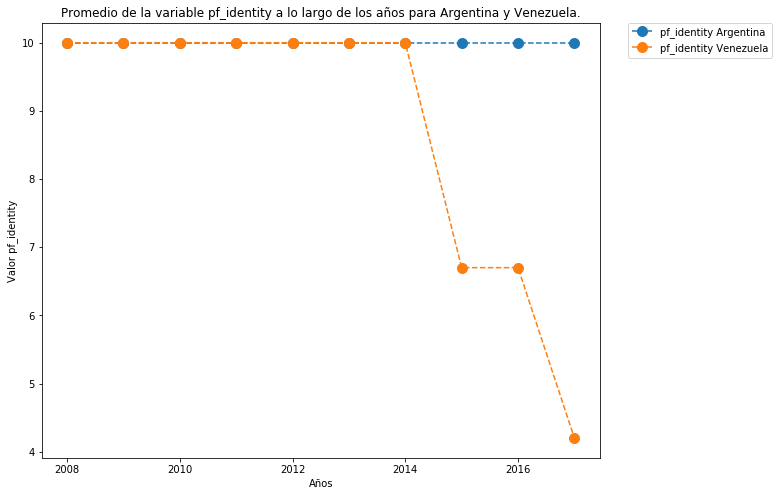

In [32]:
# Gráfico para Argentina para pf_identity a través del paso de los años.

# Agrupamos las dos columnas por año y Argentina.
arg_dataset = dataset[dataset.countries == 'Argentina']
venezuela_dataset = dataset[dataset.countries == 'Venezuela']


pf_identity_arg_group_by_year = arg_dataset[['year', 'pf_identity']].groupby('year').mean()
pf_identity_arg_group_by_year = pf_identity_arg_group_by_year.reset_index() # Ponemos al año como una columna

pf_identity_venezuela_group_by_year = venezuela_dataset[['year', 'pf_identity']].groupby('year').mean()
pf_identity_venezuela_group_by_year = pf_identity_venezuela_group_by_year.reset_index() # Ponemos al año como una columna


plt.figure(figsize=(10,8))
plt.plot(pf_identity_arg_group_by_year['year'], pf_identity_arg_group_by_year['pf_identity'], label='pf_identity Argentina',linestyle='--', marker='o', markersize=10)
plt.plot(pf_identity_venezuela_group_by_year['year'], pf_identity_venezuela_group_by_year['pf_identity'], label='pf_identity Venezuela',linestyle='--', marker='o', markersize=10)

plt.ylabel('Valor pf_identity')
plt.xlabel('Años')
plt.title('Promedio de la variable pf_identity a lo largo de los años para Argentina y Venezuela.')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


Para este punto seleccionamos el pais Argentina y podemos ver que la variable pf_identity siempre se ha mantenido en el valor 10 a través del transcurso de los años y lo comparamos con Venezuela que apartir del 2014 podemos observar que comienza a caer.


## 3. Distribuciones
1. Graficar en un mismo histograma la distribución de la variable pf_identity en global, y en Latinoamérica y el caribe. Repetir para la variable hf_score. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos el conjunto de valores disponibles para esa region en estos gráficos?

#### 3.1 Graficar en un mismo histograma la distribución de la variable pf_identity en global, y en Latinoamérica y el caribe. Repetir para la variable hf_score. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos el conjunto de valores disponibles para esa region en estos gráficos?

##### Aclaramos desde ya que las distribuciones de estas variables van a estar concentradas al lado derecho porque el esfuerzo es contínuo a mejorar los índices de libertad como parte de la pertenencia al sistema global.

Recordemos que un índice de 5 no es tan aceptable como uno de 7 o 3 si en los últimos años no hemos estado mejorando.

In [12]:
def clean_outliers(dataset, column_name):
    interesting_col = dataset[column_name]
    CI =  (interesting_col.quantile(0.75)-interesting_col.quantile(0.25))
    mask_outlier = (
        np.abs(interesting_col - interesting_col.median()) <= (1.5 * CI))
    return dataset[mask_outlier]


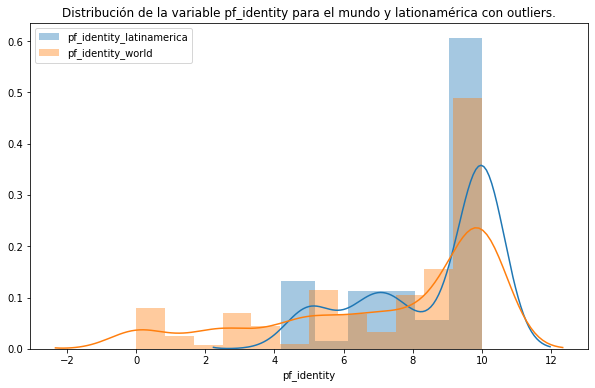

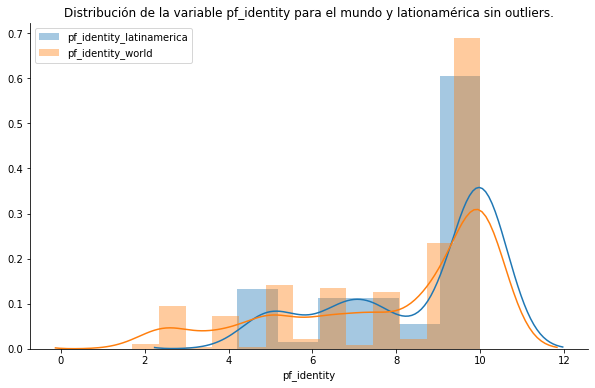

In [33]:
# Histograma para pf_identity global y en latinoamerica.
data = clean_outliers(dataset, "pf_identity")

pf_identity_latinamerica = data[(data.region == "Latin America & the Caribbean")]
# Con outlier
plt.figure(figsize=(10,6))
plt.title('Distribución de la variable pf_identity para el mundo y lationamérica con outliers.')
seaborn.distplot(
    dataset[(dataset.region == 'Latin America & the Caribbean')].pf_identity, label='pf_identity_latinamerica')
seaborn.distplot(
    dataset.pf_identity, label='pf_identity_world')
seaborn.despine()
plt.legend()  


# Sin outlier
plt.figure(figsize=(10,6))
plt.title('Distribución de la variable pf_identity para el mundo y lationamérica sin outliers.')
seaborn.distplot(pf_identity_latinamerica.pf_identity, label='pf_identity_latinamerica')
seaborn.distplot(data.pf_identity, label='pf_identity_world')
seaborn.despine()
plt.legend()

La distribución evaluada nos sugiere que la media de Latinoamérica se aleja de la media mundial en los datos originales. Sin embargo al corregir por Outliers la media Latinoaméricana es menor a la mundial.

En el gráfico podemos observar que hay valores teóricos que exceden al máximo, pero es de recordar que la variable no puede exceder el valor de 10. Esto ocurre porque los valores de mayor ocurrencia son cercanos al máximo del rango.

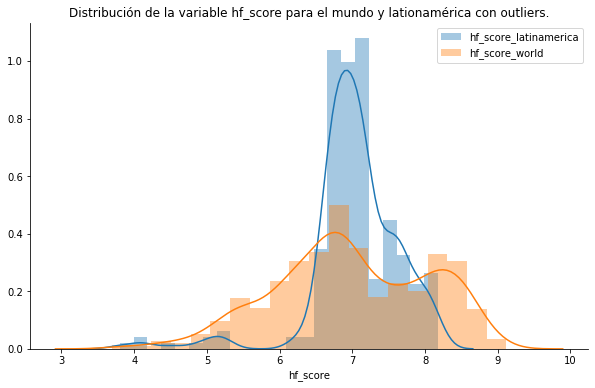

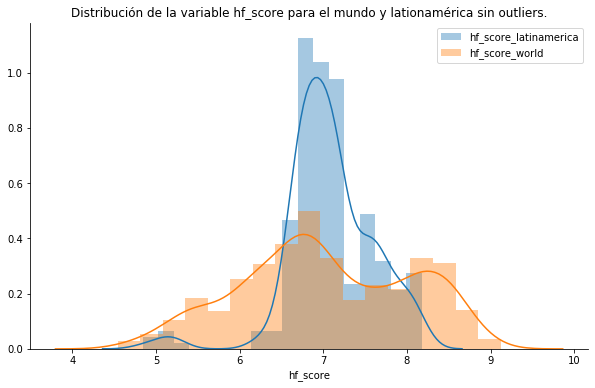

In [34]:
# Histograma para hf_score global y en latinoamerica.
data = clean_outliers(dataset, "hf_score")

hf_score_latinamerica = data[(data.region == "Latin America & the Caribbean")]

# Con Outlier
plt.figure(figsize=(10,6))
plt.title('Distribución de la variable hf_score para el mundo y lationamérica con outliers.')
seaborn.distplot(
    dataset[(dataset.region == 'Latin America & the Caribbean')].hf_score, label='hf_score_latinamerica')
seaborn.distplot(
    dataset.hf_score, label='hf_score_world')
seaborn.despine()
plt.legend()

# Sin Outlier
plt.figure(figsize=(10,6))
plt.title('Distribución de la variable hf_score para el mundo y lationamérica sin outliers.')
seaborn.distplot(hf_score_latinamerica.hf_score, label='hf_score_latinamerica')
seaborn.distplot(data.hf_score, label='hf_score_world')
seaborn.despine()
plt.legend()

Los datos del Human Freedom score corregidos de outliers refleja una distribución menos densa del caso Latinoaméricano. En el caso Latinoaméricano se observa que area de la campana es más ancho en el caso del modelo corregido por outlier.



El pf_identity index y el Human Freedom score para latinoamérica y el mundo tiene, recordemos que en general el índice supera a 5 y esta enfocado a llegar al máximo, más allá de la dirección de su tendencia. En todos los casos hay indicios de distribuciones bimodales ( e incluso multimodales), claramente en diferente intensidad

Distribuciones para hs_score:

Para hf_score en latinoamerica podemos observar que se trata de una distribución menos alejada de la normal (y leptocurtica) y para el mundo, creemos que también se trata de una distribución normal pero al tener una desviación estandar mayor, la curva es mas ancha y menos alta.

## 4. Correlaciones y Relaciones

En este ejercicio queremos responder a las preguntas

* Las libertades personales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, pf_score y ef_score. 

Como pf_indentity contribuye al cálculo de pf_score esperamos hallar algún grado de correlación. Lo contrario podría ocurrir con ef_score.

 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.
3. Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores `high`, `medium` y `low`. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como `pandas.cut` o `pandas.dcut`. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.
4. Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.




#### 4.1 ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?

Text(0.5, 1.05, 'Correlaciones y densidades de las variables pf_identity, pf_score y ef_score')

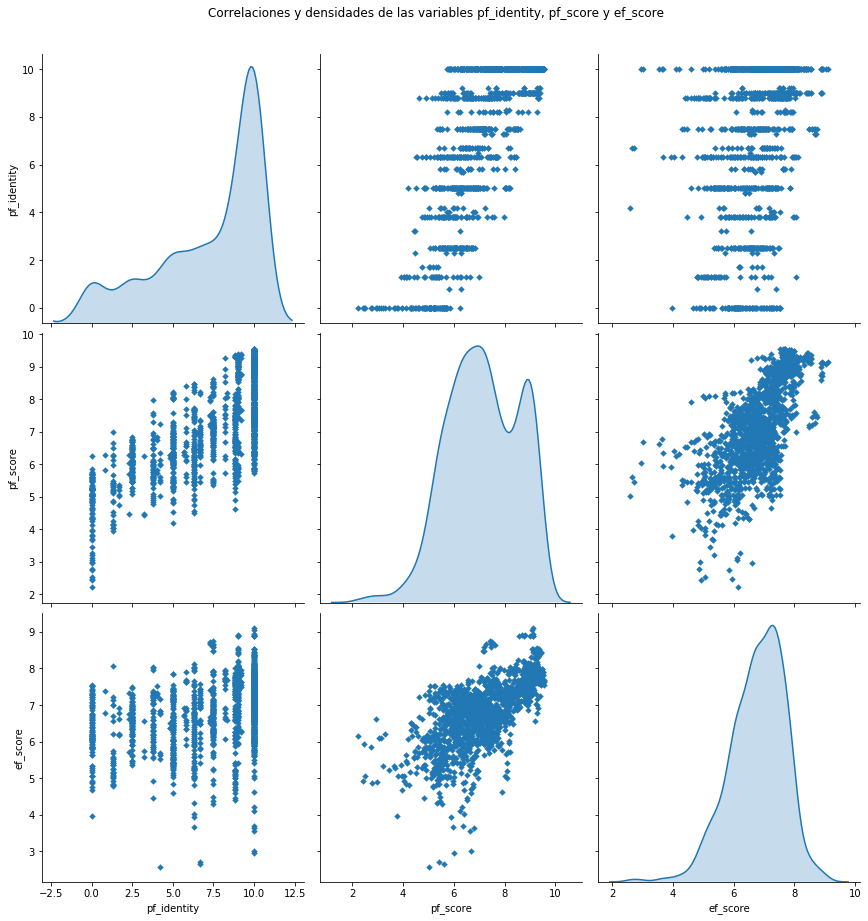

In [15]:
g = seaborn.pairplot(data=dataset,vars=['pf_identity', 'pf_score', 'ef_score'], height=4,
                     diag_kind="kde", markers="D",plot_kws=dict(s=20, edgecolor="steelblue", linewidth=0.1))
g.fig.suptitle("Correlaciones y densidades de las variables pf_identity, pf_score y ef_score", y=1.05)

Se observa una pequeña correlación positiva entre pf_identity y pf_score, lo mismo ocurre entre pf_score y ef_score.
La variable pf_identity toma valores discretos (no es continua) con lo cual el análisis gráfico es menos evidente. El grafico que muestra la relación pf_identity - pf score muestra una relación positiva, como es esperable (al ser la variable identidad un 5% de la libertad personal). La relación entre la identidad personal y la libertad económica es menos evidente, tiende a ser positiva, pero tiene mucha dispersión.

<!-- El siguiente gráfico muestra que lo observado previamente se repite a lo largo de los años analizados. Así por ejemplo el indicador de la libertad económica y humana estan positivamente correlacionados y que el human and personal identity freedom se mueven en sintonía similar de poca fortaleza. -->

<!-- La relación positiva entre la libertad económica y humana se hace más visible con el joint plot. Además nos permite ver que esa relación positiva se mantiene a pesar del caracter binomial del human score (binomialidad mencionada previamente).

La relación positiva entre la libertad de identidad y humana es tenue (ver segundo grafico) y prácticamente se anula cuando la libertad de identidad se acerca a su máximo.

Del tercer gráfico se deuce que la relación positiva se mantiene en el caso de las libertades personales y de identidad, estabilizandose en los niveles altos de la libertad de identidad. Notar que el caracter binomial del personal freedom muestra máximos ligados al máximo de la libertad de identidad. -->

#### 4.2 Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.

Text(0.5, 1.05, 'Correlaciones de pf_identity contra pf_score y pf_identity contra ef_score')

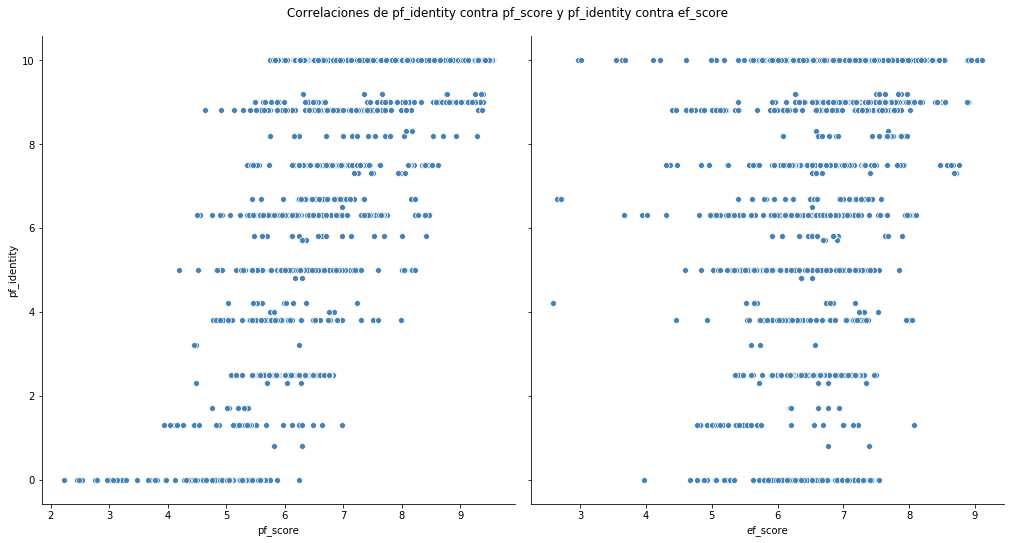

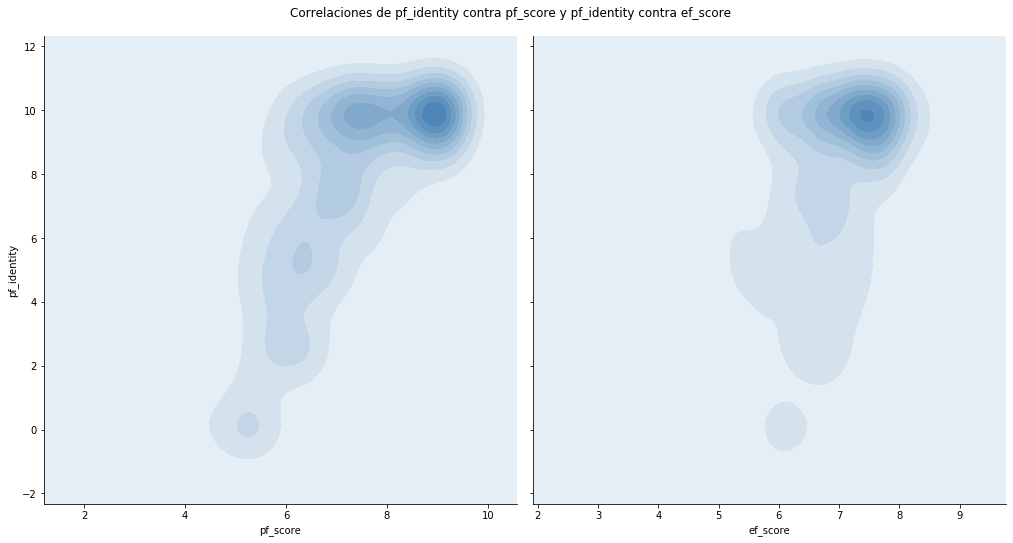

In [16]:
g = seaborn.PairGrid(dataset, y_vars=['pf_identity'], x_vars=['pf_score', 'ef_score'], height=7)
g.map(seaborn.scatterplot, color="steelblue")
g.fig.suptitle("Correlaciones de pf_identity contra pf_score y pf_identity contra ef_score", y=1.05)

g = seaborn.PairGrid(dataset, y_vars=['pf_identity'], x_vars=['pf_score', 'ef_score'], height=7)
g.map(seaborn.kdeplot, color="steelblue", shade=True)

g.fig.suptitle("Correlaciones de pf_identity contra pf_score y pf_identity contra ef_score", y=1.05)

Este tipo de gráfico con variables discretas dificulta mucho la posibilidad de sacar conclusiones. Sin embargo el planteo en terminos de su función de densidad permite ver la relación entre estas variables de una mejor manera.

#### 4.3 Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores `high`, `medium` y `low`. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como `pandas.cut` o `pandas.dcut`. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.

In [17]:
min = dataset.pf_identity.min()-1           # se le resta 1 porque la función cut no incluye el límite inferior
th_1 = dataset.pf_identity.quantile(.33)
th_2 = dataset.pf_identity.quantile(.50)    # el percentil 66 coincide con el max, pero eso usamos el 50
max = dataset.pf_identity.max()

dataset['pf_identity_segment'] = pd.cut(dataset.pf_identity, [min, th_1, th_2, max], labels= ['low', 'medium', 'high'])


min = dataset.ef_score.min()-1
th_1 = dataset.ef_score.quantile(.33)
th_2 = dataset.ef_score.quantile(.66)
max = dataset.ef_score.max()

dataset['ef_score_segment'] = pd.cut(dataset.ef_score, [min, th_1, th_2, max], labels= ['low', 'medium', 'high'])

min = dataset.pf_score.min()-1
th_1 = dataset.pf_score.quantile(.33)
th_2 = dataset.pf_score.quantile(.66)
max = dataset.pf_score.max()

dataset['pf_score_segment'] = pd.cut(dataset.pf_score, [min, th_1, th_2, max], labels= ['low', 'medium', 'high'])



dataset.loc[:, ['pf_identity', 'pf_identity_segment', 'ef_score','ef_score_segment', 'pf_score','pf_score_segment']]


,pf_identity,pf_identity_segment,ef_score,ef_score_segment,pf_score,pf_score_segment
0,5.8,low,7.67,high,8.01,high
1,0.0,low,4.77,low,5.20,low
2,5.0,low,4.83,low,5.98,low
3,10.0,high,5.67,low,8.04,high
4,8.2,medium,7.70,high,7.15,medium
...,...,...,...,...,...,...
1615,10.0,high,8.18,high,9.29,high
1616,10.0,high,7.98,high,9.49,high
1617,10.0,high,8.35,high,9.31,high
1618,10.0,high,8.46,high,9.42,high


#### 4.4 Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.

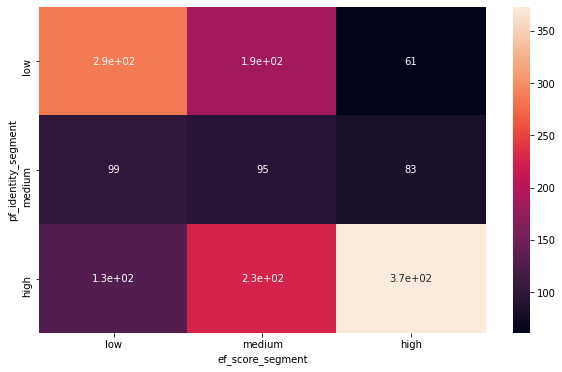

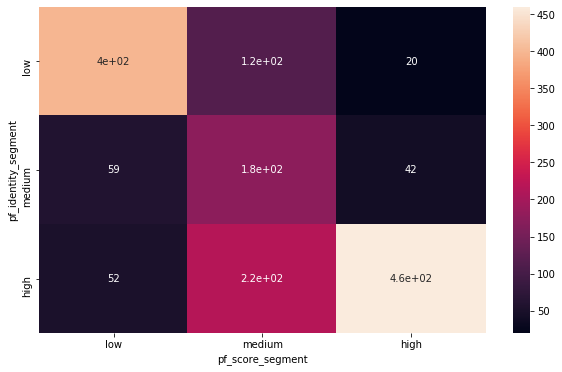

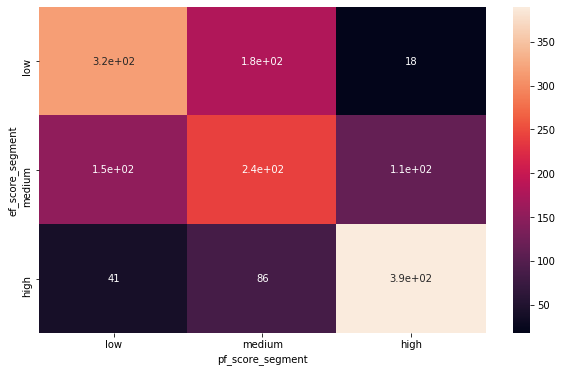

In [19]:
plt.figure(figsize=(10,6))
exp = pd.crosstab(dataset.pf_identity_segment, dataset.ef_score_segment)
seaborn.heatmap(exp, annot=True)

plt.figure(figsize=(10,6))
exp = pd.crosstab(dataset.pf_identity_segment, dataset.pf_score_segment)
seaborn.heatmap(exp, annot=True)

plt.figure(figsize=(10,6))
exp = pd.crosstab(dataset.ef_score_segment, dataset.pf_score_segment)
seaborn.heatmap(exp, annot=True)

Altos niveles de eficiencia económica no necesariamente estan correlacionados a altos niveles de libertad de identidad. Es más el primer gráfico nos muestra que la correlación entre la alta libertad económica y baja libertad de identidad es la que correlación que prevalece en el análisis segmentado en high, medium and low indicators. El tercer gráfico muestra dos casos de alta correlación: a) correlación entre la alta libertad personal y baja libertad económica, y ) correlación entre alta libertad económica y libertad personal. El segundo gráfico muestra correlaciones altas en casi todos los segmentos de la libertad de identidad y personal, lo cual es esperable al incluir el último al primero.

# Parte 2
Luego del segundo fin de semana de clase, podemos revisitar nuestro trabajo anterior y completarlo respondiendo a las siguientes preguntas:

## 5. Distribuciones
1.Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

#### 5.1 Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

En línea con lo que encontramos en el análisis de distribuciónes a través de los histogramas, el Human Freedom index estaba menos alejado de la normal para Latinoamérica. Extendiendo ese supuesto al personal freedom score aplicamos el test de Kolmogorov-Smirnof a Latinoamérica. Es decir asumimos como base (Ho) que la distribución de la variable es normal. Los desvíos con respecto a una normal teórica nos llevará a su rechazo o no. 

In [ ]:
import scipy 

def ks_test_norm(column,variable):
    # variable : nombre de la variable a utilizar
    # Remove NaN
    data=column.dropna().to_numpy()
    # Fit a normal distribution to the data:
    mu, std = scipy.stats.norm.fit(data)

    # KDE plot
    seaborn.distplot(data, label = 'KDE de datos',color='steelblue')
    seaborn.despine(left=True)

    # Normal distribution plot
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = scipy.stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'firebrick', linewidth=2, label='Dist. normal')
    title = "Ajuste de datos de "+variable +":\n y distribución normal con parámetros mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.legend()
    plt.xlabel('Puntaje')
    plt.show()

    # K-S test for a N(mu,std)
    n = scipy.stats.norm(loc=mu, scale=std)
    ks_result = scipy.stats.kstest(data, n.cdf)
    print('Resultado del test K-S:')
    print('Estadístico {}'.format(ks_result.statistic))
    print('p-value {}'.format(ks_result.pvalue))
    if ks_result.pvalue <= 0.05:
        print('H0 (Los datos se ajustan a la distribución normal): Rechazo')
    else:
        print('H0 (Los datos se ajustan a la distribución normal): No puedo rechazar')

Datos de "hf_score":


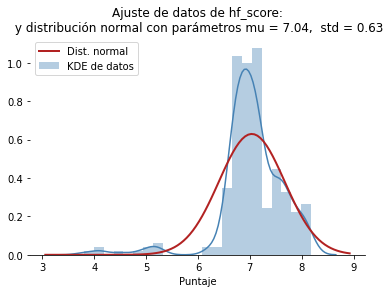

Resultado del test K-S:
Estadístico 0.16770299427352894
p-value 8.223362220413277e-07
H0 (Los datos se ajustan a la distribución normal): Rechazo


In [ ]:
print('Datos de "hf_score":')    
ks_test_norm(dataset[dataset.region == 'Latin America & the Caribbean']['hf_score'], 'hf_score')

#### 1er Gráfico
Tal como habiamos comentado en nuestro análisis de los histogramas. El Human Freedom Score tiene una distribución parecida a la normal, pero es leptocúrtica. El exceso de campana en este caso es muy grande que hace que rechacemos, al 1% de grado de signifancia,  la hipótesis nula de que tiene distribución normal.

Datos de "hf_score":


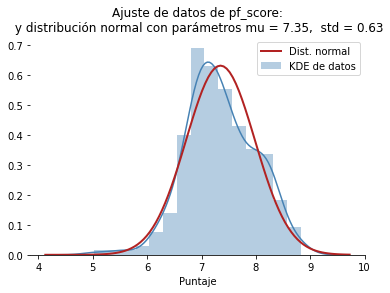

Resultado del test K-S:
Estadístico 0.054195468433476335
p-value 0.4239026359095348
H0 (Los datos se ajustan a la distribución normal): No puedo rechazar


In [ ]:
print('Datos de "hf_score":')    
ks_test_norm(dataset[dataset.region == 'Latin America & the Caribbean']['pf_score'], 'pf_score')

#### 2do Gráfico
La distribución del personal freedom es la que más se ajusta a la normal, porque no se puede rechazar Ho, aún al 10% de grado de significancia.

Datos de "hf_score":


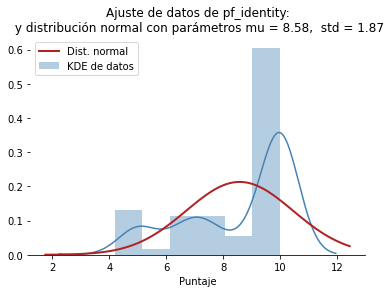

Resultado del test K-S:
Estadístico 0.3492111070640965
p-value 1.258729000680362e-28
H0 (Los datos se ajustan a la distribución normal): Rechazo


In [ ]:
print('Datos de "hf_score":')    
ks_test_norm(dataset[dataset.region == 'Latin America & the Caribbean']['pf_identity'], 'pf_identity')

#### 3er Gráfico
Habiamos mencionado en el análisis de histogramas que el pf_identity index estaba lejos de ser una normal (su caracter multimodal lo aleja más de cualquier normalidad) y los resultados muestran que al 1% de significancia se rechaza la hipótesis de normalidad.

Datos de "hf_score":


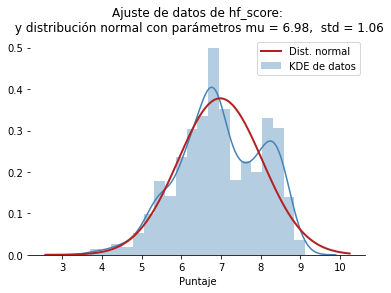

Resultado del test K-S:
Estadístico 0.06497724505720437
p-value 4.267579068369586e-06
H0 (Los datos se ajustan a la distribución normal): Rechazo


In [ ]:
print('Datos de "hf_score":')    
ks_test_norm(dataset['hf_score'], 'hf_score')

#### 4to Gráfico
El cuarto gráfico esta realizado para hacer un parangón con el primero. En este caso analizamos si la distribución del Human Freedom Score es normal o no. El histograma a priori parece normal, no es leptocúrtica pero su caracter binomial agrega errores no deseados respecto a la normal. Esos errores son tan grandes que se rechaza la HO.

Recordar que el Hf_score es bimodal porque las 10 regiones contrastan bastante en su forma de comportamiento.

## 6. Correlaciones
1. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no.
2. [Opcional] Analizar la correlación entre la region y el pf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable region es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros). Genere nuevas variables categóricas ordinales para calcular la correlación Tau de Kendal y genere una tabla de contingencia con esas nuevas variables.

#### 6.1 Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no.

In [20]:
print('Matriz de correlaciones:')
display(data[['hf_score', 'ef_score', 'pf_score', 'pf_identity']].corr())

Matriz de correlaciones:


,hf_score,ef_score,pf_score,pf_identity
hf_score,1.000000,0.870208,0.947157,0.624590
ef_score,0.870208,1.000000,0.666208,0.337173
pf_score,0.947157,0.666208,1.000000,0.726013
pf_identity,0.624590,0.337173,0.726013,1.000000


En este caso, las correlaciones difieren un poco de las encontradas en el gráfico incial porque en este caso se esta corrigiendo por outliers. Otra manera de encontrar estas tasas de correlación es aplicando el siguiente código, en cual calculamos el coeficiente de correlación de Pearson.

In [21]:
# calculate the Pearson's correlation between two variables
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(data['hf_score'], data['ef_score'])
print('Coeficiente de correlación de Pearson entre hf-ef: %.3f \n' % corr)

corr, _ = pearsonr(data['hf_score'], data['pf_score'])
print('Coeficiente de correlación de Pearson entre hf-pf: %.3f \n' % corr)

corr, _ = pearsonr(data['hf_score'], data['pf_identity'])
print('Coeficiente de correlación de Pearson entre hf-pf_identity: %.3f \n' % corr)

corr, _ = pearsonr(data['ef_score'], data['pf_identity'])
print('Coeficiente de correlación de Pearson entre ef-pf_identity: %.3f \n' % corr)

Coeficiente de correlación de Pearson entre hf-ef: 0.870 

Coeficiente de correlación de Pearson entre hf-pf: 0.947 

Coeficiente de correlación de Pearson entre hf-pf_identity: 0.625 

Coeficiente de correlación de Pearson entre ef-pf_identity: 0.337 



In [22]:
# calculate the Spearman's correlation between two variables
from scipy.stats import spearmanr
print('Correlación de Spearmans: hf - ef')
coef, p = spearmanr(data['hf_score'], data['ef_score'])
print('Coeficiente de correlación de Spearmans: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('H0 (Las muestras no están correlacionadas): No puedo rechazar p=%.3f\n' % p)
else:
	print('H0 (Las muestras no están correlacionadas): Rechazo p=%.3f\n' % p)

from scipy.stats import spearmanr
print('Correlación de Spearmans: hf - pf')
coef, p = spearmanr(data['hf_score'], data['pf_score'])
print('Coeficiente de correlación de Spearmans: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('H0 (Las muestras no están correlacionadas): No puedo rechazar p=%.3f\n' % p)
else:
	print('H0 (Las muestras no están correlacionadas): Rechazo p=%.3f\n' % p)

from scipy.stats import spearmanr
print('Correlación de Spearmans: hf - pf_identity')
coef, p = spearmanr(data['hf_score'], data['pf_identity'])
print('Coeficiente de correlación de Spearmans: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('H0 (Las muestras no están correlacionadas): No puedo rechazar p=%.3f\n' % p)
else:
	print('H0 (Las muestras no están correlacionadas): Rechazo p=%.3f\n' % p)

from scipy.stats import spearmanr
print('Correlación de Spearmans: ef - pf_identity')
coef, p = spearmanr(data['ef_score'], data['pf_identity'])
print('Coeficiente de correlación de Spearmans: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('H0 (Las muestras no están correlacionadas): No puedo rechazar p=%.3f\n' % p)
else:
	print('H0 (Las muestras no están correlacionadas): Rechazo p=%.3f\n' % p)
 

Correlación de Spearmans: hf - ef
Coeficiente de correlación de Spearmans: 0.876
H0 (Las muestras no están correlacionadas): Rechazo p=0.000

Correlación de Spearmans: hf - pf
Coeficiente de correlación de Spearmans: 0.950
H0 (Las muestras no están correlacionadas): Rechazo p=0.000

Correlación de Spearmans: hf - pf_identity
Coeficiente de correlación de Spearmans: 0.639
H0 (Las muestras no están correlacionadas): Rechazo p=0.000

Correlación de Spearmans: ef - pf_identity
Coeficiente de correlación de Spearmans: 0.385
H0 (Las muestras no están correlacionadas): Rechazo p=0.000



Las correlaciones de Spearman no son tan diferentes de las correlaciones lineales (o de Pearson), pero en este caso podemos conocer el grado de significancia. En todos los casos no se rechaza la hipotesís nula de que todos los coeficientes de correlación encontrados son diferentes de cero.